In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def therm_resistance(t):
    t_K = t + 273.15
    R_ref = 10_000
    A = -14.6337
    B = 4791.842 # K
    C = -115334 # K^2
    D = -3.730535E6 # K^3
    return R_ref * np.exp(A + B/t_K + C/t_K**2 + D/t_K**3)

10000.195715113117


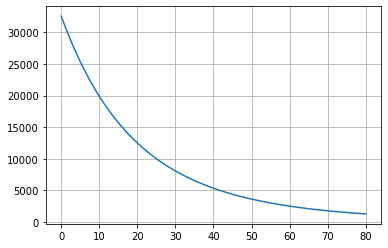

In [3]:
t_low = 0
t_high = 80

temps = np.linspace(t_low, t_high, 100)
res = therm_resistance(temps)
print(therm_resistance(25))
plt.plot(temps, res);
plt.grid()

In [4]:
def par_resistance(t, r_par = 10_000):
    return 1.0 / (1.0 / r_par + 1.0 / therm_resistance(t))

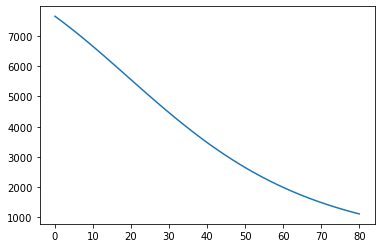

In [5]:
res_par = par_resistance(temps)
plt.plot(temps, res_par)

In [6]:
def cir_resistance(t, r_par = 10_000, r_ser = 1_000):
    return r_ser + par_resistance(t, r_par=r_par)

Voltage Range: 2.9710599833412266 (4.6434158531866965, 1.6723558698454697)
Slope: 0.03713824979176533 Volts/C


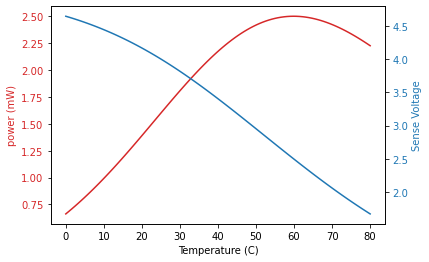

In [14]:
r_par = 5_000
r_ser = 5000
res_par = par_resistance(temps, r_par=r_par)
res_cir = cir_resistance(temps, r_par=r_par, r_ser=r_ser)
# plt.plot(temps, res_cir, label='R')

V = 10  # Volts
I = V / res_cir
V_sens = I * res_par
power = V_sens**2 / res

plt.plot(temps, power*1E3, color="tab:red")
plt.ylabel('power (mW)', color='tab:red')
plt.xlabel('Temperature (C)')
plt.tick_params(axis='y', labelcolor='tab:red')

ax = plt.twinx()
ax.plot(temps, V_sens, color="tab:blue")
plt.ylabel('Sense Voltage', color='tab:blue')
plt.tick_params(axis='y', labelcolor='tab:blue')
print(f'Voltage Range: {V_sens[0]-V_sens[-1]} ({V_sens[0]}, {V_sens[-1]})')
print(f'Slope: {(V_sens[0]-V_sens[-1]) / (temps[-1]-temps[0])} Volts/C')

Text(0, 0.5, 'Current (mA)')

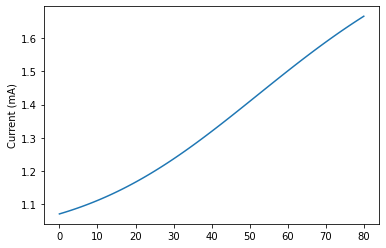

In [8]:
plt.plot(temps, I*1E3)
plt.ylabel('Current (mA)')